# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

# Useful Functions

def act(env, actions, brain_name="ReacherBrain") -> tuple:
    """Sends actions to the environment env and observes the results.
    Returns a tuple of rewards, next_states, dones (One per agent)"""
    action_result = env.step(actions)[brain_name] # Act on the environment and observe the result
    return (action_result.rewards,
            action_result.vector_observations, # next states
            action_result.local_done) # True if the episode ended
    
def reset(env, training=True, brain_name="ReacherBrain") -> np.ndarray:
    """Resetting the unity environment"""
    return env.reset(train_mode=training)[brain_name].vector_observations

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726671e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Ready for training

In the next code cell, we shall start our preparation for training

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
# Invite our agent & import torch
from ddpg_agent import Agent
import torch

In [6]:
def train2(agent, env, num_episodes, log_freq, max_t=20000):        
    score_hist = np.zeros((num_agents, 1))
    
    # Train
    for i in range(num_episodes):
        states = reset(env)
        scores = np.zeros(num_agents)
        for j in range(max_t): # Safer than while
            # Decide
            #state = states.squeeze() # One agent only
            actions = agent.act(states)  # Choose an action based on the state
            #actions = np.expand_dims(action, 0) # One agent only
            # Act
            rewards, next_states, dones = act(env, actions)     # Send the actions to the environment
            scores += rewards                         # update the score (for each agent)
            # Learn
            agent.step(states, actions, rewards[0], next_states[0], dones[0]) # Learn step
            # Step
            states = next_states                               # roll over states to next time step
            # Exit
            if np.any(dones):                                  # exit loop if episode finished
                break       
        # Logging
        score_hist = np.concatenate((score_hist, scores[:, None]), axis=1)
        if (i % log_freq == 0) and (i > 0):
            print(f'Average score of episodes {i-log_freq+1}-{i+1}: {np.mean(score_hist.squeeze()[-log_freq:])}')
        
        if np.mean(score_hist.squeeze()[-100:]) >= 30:
            print(f'Solved in {i} steps!')
            break
            
    return score_hist.squeeze()

def train(agent, env, num_episodes, log_freq, max_t=20000):        
    score_hist = np.zeros((num_agents, 1))
    
    # Train
    for i in range(num_episodes):
        states = reset(env)
        agent.reset()
        scores = np.zeros(num_agents)
        for j in range(max_t): # Safer than while
            # Decide
            #state = states.squeeze() # One agent only
            actions = agent.act(states)  # Choose an action based on the state
            #actions = np.expand_dims(action, 0) # One agent only
            # Act
            rewards, next_states, dones = act(env, actions)     # Send the actions to the environment
            scores += rewards                         # update the score (for each agent)
            # Learn
            agent.step(states, actions, rewards[0], next_states[0], dones[0]) # Learn step
            # Step
            states = next_states                               # roll over states to next time step
            # Exit
            if np.any(dones):                                  # exit loop if episode finished
                break       
        # Logging
        score_hist = np.concatenate((score_hist, scores[:, None]), axis=1)
        if (i % log_freq == 0) and (i > 0):
            print(f'Average score of episodes {i-log_freq+1}-{i+1}: {np.mean(score_hist.squeeze()[-log_freq:])}')
        
        if np.mean(score_hist.squeeze()[-100:]) >= 30:
            print(f'Solved in {i} steps!')
            break
            
    return score_hist.squeeze()

Train Now!

In [7]:
agent = Agent(state_size, action_size, np.random.randint(1e5))
score_hist = train(agent, env, num_episodes=500, log_freq=10)

Average score of episodes 1-11: 0.8929999800398946
Average score of episodes 11-21: 1.1369999745860695
Average score of episodes 21-31: 1.2379999723285438
Average score of episodes 31-41: 2.428999945707619
Average score of episodes 41-51: 2.3449999475851655
Average score of episodes 51-61: 3.5679999202489854
Average score of episodes 61-71: 2.597999941930175
Average score of episodes 71-81: 3.129999930039048
Average score of episodes 81-91: 4.038999909721315
Average score of episodes 91-101: 3.9009999128058555
Average score of episodes 101-111: 4.999999888241291
Average score of episodes 111-121: 5.176999884285033
Average score of episodes 121-131: 4.644999896176159
Average score of episodes 131-141: 5.20199988372624
Average score of episodes 141-151: 8.695999805629253
Average score of episodes 151-161: 8.05499981995672
Average score of episodes 161-171: 11.484999743290246
Average score of episodes 171-181: 9.27199979275465
Average score of episodes 181-191: 13.219999704509974
Average 

## Plot

In [8]:
from matplotlib import pyplot as plt

In [9]:
def moving_average(signal:np.ndarray , period: int):
    buffer = [np.nan] * period
    for i in range(period,len(signal)):
        buffer.append(signal[i-period:i].mean())
    return np.array(buffer)

(0, 300)

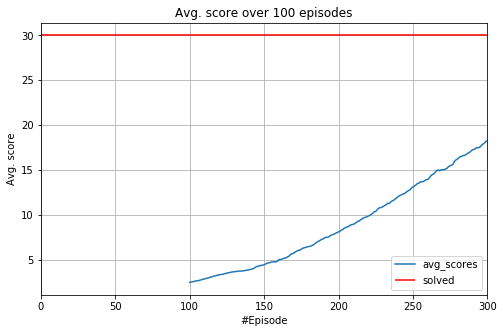

In [10]:
length = 100
avg_scores = moving_average(score_hist, length)
plt.figure(figsize=(8,5))
plt.plot(avg_scores, label='avg_scores')
plt.hlines(30, xmin=0, xmax=300, colors='r', label='solved')
plt.grid()
plt.xlabel('#Episode')
plt.ylabel('Avg. score')
plt.title(f'Avg. score over {length} episodes')
plt.legend(loc='lower right')
plt.xlim((0, 300))

## Save My Weights

In [14]:
from datetime import datetime
def save_agent(agent, avg_scores=None):
    """Saves the agent's parameters and the underlying pytorch model"""
    checkpoint = {'actor_state_dict': agent.actor_local.state_dict(),
                  'critic_state_dict': agent.critic_local.state_dict(),
                  'score_hist': score_hist}
            
    torch.save(checkpoint, 'my_weights.pth')

In [15]:
save_agent(agent, avg_scores=avg_scores)

When finished, you can close the environment.

In [16]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 